In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# check version on sklearn
print('Version of sklearn:', sklearn.__version__)

Version of sklearn: 1.3.1


In [3]:
# loading the pre-processed dataset
data_train = pd.read_csv('train_BigMartSales.csv')

In [4]:
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
data_train.Item_Identifier.value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [6]:
data_train.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [7]:
data_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
# checking missing values
data_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
data_train = data_train.drop('Item_Identifier', axis=1)

In [10]:
data_train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

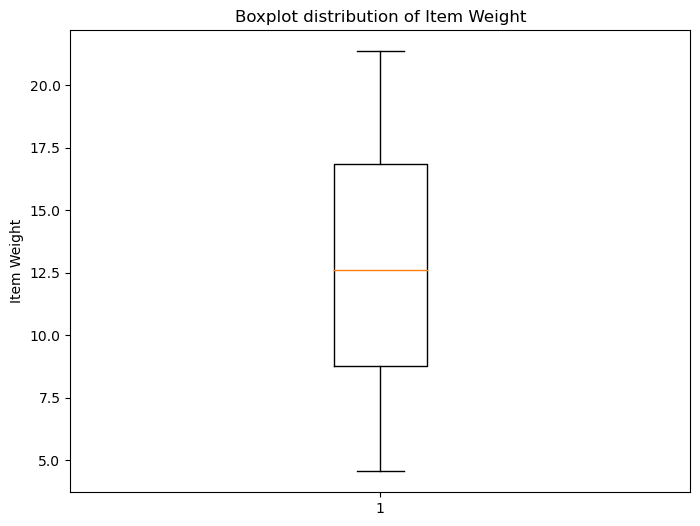

In [11]:
# Lets's visualize the Item Weight feature to decide how we can impute its missing values.
data_train_filtered_itemWeight = data_train.dropna(subset=['Item_Weight'])

# Boxplot for Item_Weight
plt.figure(figsize=(8, 6))
plt.boxplot(data_train_filtered_itemWeight['Item_Weight'])
plt.ylabel('Item Weight')
plt.title('Boxplot distribution of Item Weight')
plt.show()

In [12]:
data_train.Item_Weight.min(), data_train.Item_Weight.max()

(4.555, 21.35)

In [13]:
data_train.Item_Weight.quantile(0.25), data_train.Item_Weight.quantile(0.75)

(8.77375, 16.85)

In [14]:
data_train.Item_Weight.median(), data_train.Item_Weight.mean()

(12.6, 12.857645184135976)

As we are not seeing any outliers in the data, we would impute the null values by **Mean**.

In [15]:
data_train['Item_Weight'].fillna(data_train['Item_Weight'].mean(), inplace=True)

In [16]:
data_train['Item_Weight'].isnull().sum()

0

In [17]:
data_train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [18]:
# Randomly select from non-null values for the null positions
random_choices_outlet_size_train = np.random.choice(data_train['Outlet_Size'].dropna(), size=data_train['Outlet_Size'].isnull().sum(), replace=True)

In [19]:
data_train.loc[data_train['Outlet_Size'].isnull(), 'Outlet_Size'] = random_choices_outlet_size_train

In [20]:
data_train.Outlet_Size.isnull().sum()

0

In [21]:
data_train.Outlet_Size.value_counts()

Medium    3884
Small     3352
High      1287
Name: Outlet_Size, dtype: int64

In [22]:
data_train.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [23]:
data_train.select_dtypes(include=['object']).columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [24]:
data_train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [25]:
# Map the different representations to "Low Fat" and "Regular"
data_train['Item_Fat_Content'] = data_train['Item_Fat_Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
})

In [26]:
data_train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [27]:
data_train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [28]:
data_train.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [29]:
data_train['Outlet_Establishment_Year'] = data_train['Outlet_Establishment_Year'].astype(str)

In [30]:
data_train['Outlet_Establishment_Year'].dtypes

dtype('O')

In [31]:
data_train['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [32]:
data_train.Outlet_Size.value_counts()

Medium    3884
Small     3352
High      1287
Name: Outlet_Size, dtype: int64

In [33]:
data_train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [34]:
data_train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

1. Item Fat Content, Outlet Establishment Year, Outlet Size & Outlet Location will be **Label Encoded**.
2. Item Type, Outlet Identifier, Outlet Type will be **One-Hot Encoded**.

In [35]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [36]:
# Label Encoding for Item_Fat_Content, Outlet_Size, and Outlet_Location_Type
le_train = LabelEncoder()
for col_le_train in ['Item_Fat_Content', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type']:
    data_train[col_le_train] = le_train.fit_transform(data_train[col_le_train])

In [37]:
# One-Hot Encoding for Item_Type, Outlet_Identifier, and Outlet_Type
data_train = pd.get_dummies(data_train, columns=['Item_Type', 'Outlet_Identifier', 'Outlet_Type'], drop_first=True)

In [38]:
data_train.select_dtypes(include=['float64']).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

In [39]:
# Splitting the data into features and target variable
X_train_data = data_train.drop('Item_Outlet_Sales', axis=1)
y_train_data = data_train['Item_Outlet_Sales']

In [40]:
import seaborn as sns

In [41]:
numeric_features_train = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

In [42]:
from scipy import stats

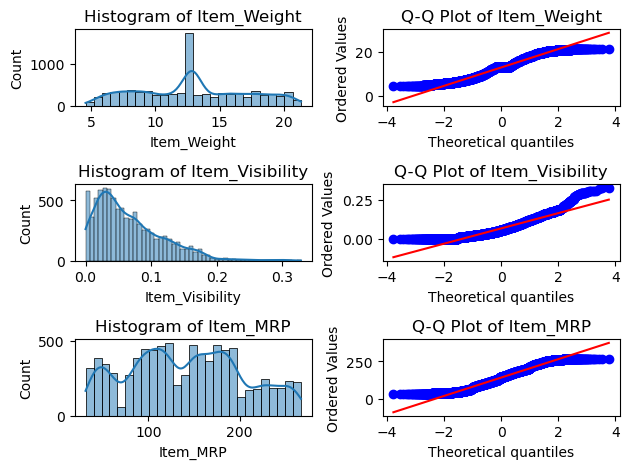

In [43]:
for i, feature in enumerate(numeric_features_train):
    plt.subplot(3, 2, 2*i+1)
    sns.histplot(X_train_data[feature], kde=True)
    plt.title(f'Histogram of {feature}')

    plt.subplot(3, 2, 2*i+2)
    stats.probplot(X_train_data[feature].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {feature}')

plt.tight_layout()
plt.show()

In [44]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [45]:
scaler_standard_train = StandardScaler()
scaler_minmax_train = MinMaxScaler()

In [46]:
# Standard Scaling for normally distributed feature
X_train_data['Item_Weight'] = scaler_standard_train.fit_transform(X_train_data[['Item_Weight']])

# Min-Max Scaling for non-normally distributed features
X_train_data['Item_Visibility'] = scaler_minmax_train.fit_transform(X_train_data[['Item_Visibility']])
X_train_data['Item_MRP'] = scaler_minmax_train.fit_transform(X_train_data[['Item_MRP']])

In [47]:
X_train_data[['Item_Weight', 'Item_Visibility', 'Item_MRP']].head()

,Item_Weight,Item_Visibility,Item_MRP
0,-0.841872,0.048866,0.927507
1,-1.641706,0.058705,0.072068
2,1.098554,0.051037,0.468288
3,1.500838,0.000000,0.640093
4,-0.929428,0.000000,0.095805


In [48]:
X_train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.841872,0,0.048866,0.927507,4,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,-1.641706,1,0.058705,0.072068,8,1,2,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1.098554,0,0.051037,0.468288,4,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1.500838,1,0.000000,0.640093,3,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.929428,0,0.000000,0.095805,1,0,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [49]:
y_train_data.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [50]:
X_train_data.shape, y_train_data.shape

((8523, 34), (8523,))

In [51]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_data, y_train_data, test_size=0.2, random_state=42)

### Define architecture of the model

In [52]:
# checking the version of keras
import keras
print(keras.__version__)

3.3.3


In [53]:
# checking the version of tensorflow
import tensorflow as tf
print(tf.__version__)

2.16.1


### Create a model

In [54]:
# importing the sequential model
from keras.models import Sequential

### Defining the layers

In [55]:
# importing different layers from keras
from keras.layers import InputLayer, Dense

In [56]:
# defining input neurons
input_neurons = X_train.shape[1]

In [57]:
input_neurons

34

In [58]:
# define number of output neurons
output_neurons = 1

In [59]:
# define hidden layers and neuron in each layer
number_of_hidden_layers = 3
neuron_hidden_layer_1 = 20
neuron_hidden_layer_2 = 10
neuron_hidden_layer_3 = 5

In [60]:
# defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_3, activation='relu'))
model.add(Dense(units=output_neurons, activation='linear'))

C:\Users\udmitra\anaconda3\lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [61]:
# summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │             700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 971 (3.79 KB)

 Trainable params: 971 (3.79 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
# number of parameters between input and first hidden layer
# adding the bias for each neuron of first hidden layer

input_neurons*neuron_hidden_layer_1 + 20

700

In [63]:
# number of parameters between first and second hidden layer

neuron_hidden_layer_1*neuron_hidden_layer_2 + 10

210

In [64]:
# number of parameters between second hidden and third hidden layer

neuron_hidden_layer_2*neuron_hidden_layer_3 + 5

55

In [65]:
# number of parameters between third hidden layer and output layer

neuron_hidden_layer_3*output_neurons + 1

6

### Compiling the model (defining loss function, optimizer)

In [66]:
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import RMSprop

In [67]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [68]:
# loss as Mean_Squared_Error, since we have Regression problem
# defining the optimizer as rmsprop
# Evaluation metric as RMSE
# Compiling the model with RMSprop optimizer

model.compile(loss='mean_squared_error', optimizer=RMSprop(learning_rate=0.001), metrics=[root_mean_squared_error])

In [69]:
from tensorflow.keras.callbacks import EarlyStopping

In [70]:
# Early stopping callback to stop training when validation loss does not improve
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

### Train the model

In [71]:
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/200
214/214 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 7744719.0000 - root_mean_squared_error: 2759.7717 - val_loss: 6834400.0000 - val_root_mean_squared_error: 2583.3213
Epoch 2/200
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7012070.5000 - root_mean_squared_error: 2616.9351 - val_loss: 5142160.0000 - val_root_mean_squared_error: 2232.4314
Epoch 3/200
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4905441.0000 - root_mean_squared_error: 2179.1348 - val_loss: 2888934.2500 - val_root_mean_squared_error: 1668.7734
Epoch 4/200
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3143984.0000 - root_mean_squared_error: 1740.9879 - val_loss: 2618309.5000 - val_root_mean_squared_error: 1591.6664
Epoch 5/200
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2826076.0000 - root_mean_squared_error: 1658.9581 - val_loss: 2402498.5000 - val_root_mean_squared_error: 1525.1404
Epoch 6/200
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2622743.5000 - root_mean_squared_error: 1594.0468 - va

### Visualizing the model performance

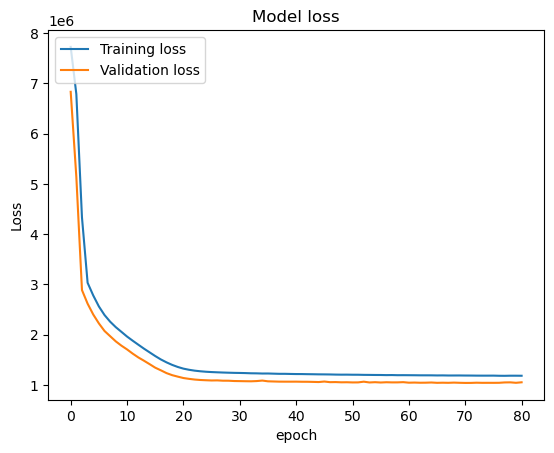

In [72]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Training loss', 'Validation loss'], loc='upper left')
plt.show()

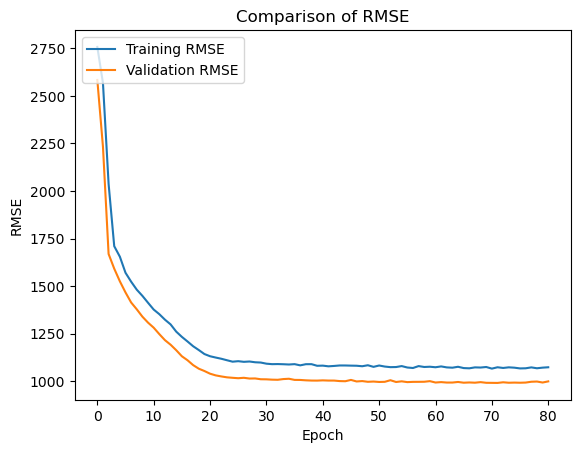

In [73]:
# summarize history for accuracy
plt.plot(model_history.history['root_mean_squared_error'])
plt.plot(model_history.history['val_root_mean_squared_error'])
plt.title('Comparison of RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(['Training RMSE', 'Validation RMSE'], loc='upper left')
plt.show()

### Evaluating model performance on validation set

In [74]:
loss_train, rmse_value = model.evaluate(X_test, y_test)
print(f'Root Mean Square Error on validation set: {rmse_value}')

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1042820.8750 - root_mean_squared_error: 999.4119 
Root Mean Square Error on validation set: 991.5069580078125


### Implement the pre-processing steps on the Test dataset

In [75]:
# loading the pre-processed dataset
data_test = pd.read_csv('test_BigMartSales.csv')

In [76]:
data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [77]:
data_test.Outlet_Identifier.value_counts()

OUT027    624
OUT013    621
OUT049    620
OUT046    620
OUT035    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: Outlet_Identifier, dtype: int64

In [78]:
data_test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [79]:
data_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [80]:
test_data = data_test.copy()

In [81]:
data_test = data_test.drop('Item_Identifier', axis=1)

In [82]:
data_test.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

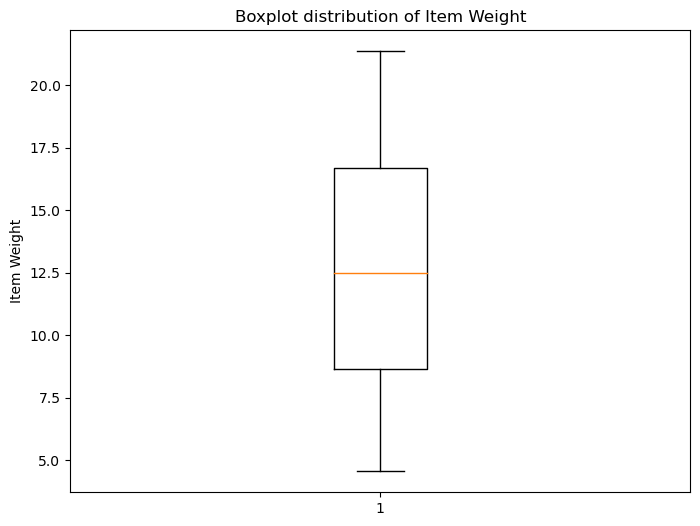

In [83]:
# Lets's visualize the Item Weight feature to decide how we can impute its missing values.
data_test_filtered_itemWeight = data_test.dropna(subset=['Item_Weight'])

# Boxplot for Item_Weight
plt.figure(figsize=(8, 6))
plt.boxplot(data_test_filtered_itemWeight['Item_Weight'])
plt.ylabel('Item Weight')
plt.title('Boxplot distribution of Item Weight')
plt.show()

In [84]:
data_test.Item_Weight.min(), data_test.Item_Weight.max()

(4.555, 21.35)

In [85]:
data_test.Item_Weight.quantile(0.25), data_test.Item_Weight.quantile(0.75)

(8.645, 16.7)

In [86]:
data_test.Item_Weight.median(), data_test.Item_Weight.mean()

(12.5, 12.695633368756642)

Since there are no significant outliers, we will impute the null values by **Mean**.

In [87]:
data_test['Item_Weight'].fillna(data_test['Item_Weight'].mean(), inplace=True)

In [88]:
data_test['Item_Weight'].isnull().sum()

0

In [89]:
data_test.Outlet_Size.value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [90]:
# Randomly select from non-null values for the null positions
random_choices_outlet_size_test = np.random.choice(data_test['Outlet_Size'].dropna(), size=data_test['Outlet_Size'].isnull().sum(), replace=True)

In [91]:
data_test.loc[data_test['Outlet_Size'].isnull(), 'Outlet_Size'] = random_choices_outlet_size_test

In [92]:
data_test.Outlet_Size.isnull().sum()

0

In [93]:
data_test.Outlet_Size.value_counts()

Medium    2618
Small     2211
High       852
Name: Outlet_Size, dtype: int64

In [94]:
data_test.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [95]:
data_test.select_dtypes(include=['object']).columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [96]:
data_test.Item_Fat_Content.value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [97]:
# Map the different representations to "Low Fat" and "Regular"
data_test['Item_Fat_Content'] = data_test['Item_Fat_Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
})

In [98]:
data_test.Item_Fat_Content.value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [99]:
data_test.Item_Type.value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

In [100]:
data_test['Outlet_Establishment_Year'] = data_test['Outlet_Establishment_Year'].astype(str)

In [101]:
data_test['Outlet_Establishment_Year'].dtypes

dtype('O')

In [102]:
data_test['Outlet_Establishment_Year'].value_counts()

1985    976
1987    621
1999    620
1997    620
2004    620
2002    619
2009    618
2007    617
1998    370
Name: Outlet_Establishment_Year, dtype: int64

In [103]:
data_test.Outlet_Location_Type.value_counts()

Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64

In [104]:
data_test.Outlet_Type.value_counts()

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64

In [105]:
# Label Encoding for Item_Fat_Content, Outlet_Size, and Outlet_Location_Type
le_test = LabelEncoder()
for col_le_test in ['Item_Fat_Content', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type']:
    data_test[col_le_test] = le_test.fit_transform(data_test[col_le_test])

In [106]:
# One-Hot Encoding for Item_Type, Outlet_Identifier, and Outlet_Type
data_test = pd.get_dummies(data_test, columns=['Item_Type', 'Outlet_Identifier', 'Outlet_Type'], drop_first=True)

In [107]:
data_test.select_dtypes(include=['float64']).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')

In [108]:
numeric_features_test = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

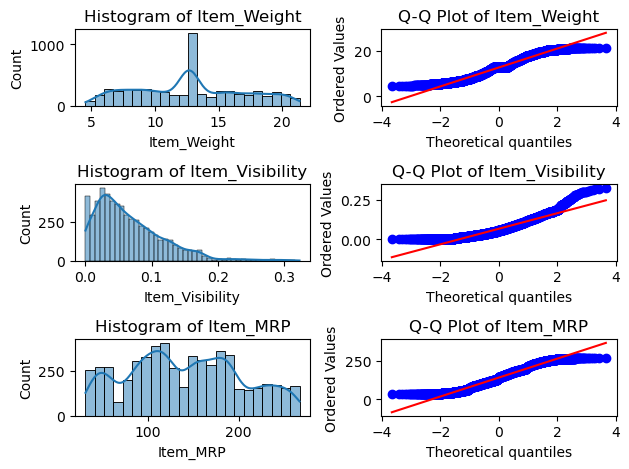

In [109]:
for i, feature in enumerate(numeric_features_test):
    plt.subplot(3, 2, 2*i+1)
    sns.histplot(data_test[feature], kde=True)
    plt.title(f'Histogram of {feature}')

    plt.subplot(3, 2, 2*i+2)
    stats.probplot(data_test[feature].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {feature}')

plt.tight_layout()
plt.show()

In [110]:
scaler_standard_test = StandardScaler()
scaler_minmax_test = MinMaxScaler()

In [111]:
# Standard Scaling for normally distributed feature
data_test['Item_Weight'] = scaler_standard_test.fit_transform(data_test[['Item_Weight']])

# Min-Max Scaling for non-normally distributed features
data_test['Item_Visibility'] = scaler_minmax_test.fit_transform(data_test[['Item_Visibility']])
data_test['Item_MRP'] = scaler_minmax_test.fit_transform(data_test[['Item_MRP']])

In [112]:
data_test[['Item_Weight', 'Item_Visibility', 'Item_MRP']].head()

,Item_Weight,Item_Visibility,Item_MRP
0,1.897460e+00,0.023374,0.323413
1,-1.035530e+00,0.118737,0.235849
2,4.486336e-01,0.307674,0.894140
3,-1.267578e+00,0.047548,0.524488
4,4.184768e-16,0.366458,0.862069


In [113]:
data_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1.897460e+00,0,0.023374,0.323413,4,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,-1.035530e+00,1,0.118737,0.235849,7,2,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4.486336e-01,0,0.307674,0.894140,3,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.267578e+00,0,0.047548,0.524488,7,2,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4.184768e-16,1,0.366458,0.862069,0,1,2,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [114]:
X_train_data.shape, data_test.shape

((8523, 34), (5681, 34))

#### Now, let's *predict the output* in the test data using the trained model.

In [115]:
predictions = model.predict(data_test)

178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


### Prepare the final predicted data

In [117]:
# Checking the shapes of the columns involved
print(test_data['Item_Identifier'].shape)
print(test_data['Outlet_Identifier'].shape)
print(predictions.shape)

(5681,)
(5681,)
(5681, 1)


In [118]:
# Ensure predictions is a 1-dimensional array
if predictions.ndim != 1:
    predictions = predictions.flatten()

In [119]:
item_outlet_sales_final_predictions = pd.DataFrame({'Item_Identifier': test_data['Item_Identifier'], 'Outlet_Identifier': test_data['Outlet_Identifier'], 'Item_Outlet_Sales': predictions})

In [120]:
item_outlet_sales_final_predictions.to_csv('item_outlet_sales_predictions_uddipan-mitra.csv', index=False)